In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
import pandas as pd

In [75]:
allWeeks = pd.read_csv('all_weeks.csv')

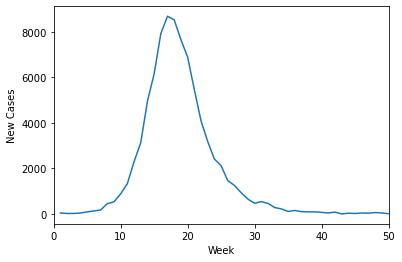

In [76]:
x = allWeeks['Week']
y = allWeeks['New Cases']*10
plt.plot(x, y)
plt.xlabel('Week')
plt.ylabel('New Cases')
plt.xlim(0,50)
plt.show()

In [135]:
def eulerSIR(initial, R0):
    gamma = 1/2
    beta = R0*gamma
    N, I0, S0 = initial
    
    dt = 0.1
    # lists to store SIR values & initial conditions
    sList = []
    sList.append(S0)
    iList = []
    iList.append(I0)
    rList = []
    rList.append((N-S0-I0))

    # list to store time
    time = np.arange(0, 50, dt).tolist()
    
    for i in range(0,len(time)-1):
        S = sList[-1] - ((beta * sList[-1] * iList[-1])/ N) * dt 
        I = iList[-1] + (((beta * sList[-1] * iList[-1])/ N) - gamma * iList[-1]) * dt 
        R = rList[-1] + (gamma * iList[-1]) * dt 
        sList.append(S)
        iList.append(I)
        rList.append(R)
        
    return((time,sList,iList,rList))
        

In [200]:
def plot(time, sList, iList, rList):
    fig, ax = plt.subplots(nrows=1,ncols=1)
    # ax.plot(time,sList,label='S',color="blue")
    ax.plot(time,iList,label='SIR',color="red")
    x = allWeeks['Week']
    y = allWeeks['New Cases']*10
    ax.plot(x,y, label = 'Data')
    # ax.plot(time,rList,label='R',color="black")
    ax.legend(loc='center right')
    ax.set_xlim(left=0, right = 50)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    ax.set_title('SIR Plot')

In [201]:
initial = (100000,180,100000-180) # initial conditions (N,I,S)

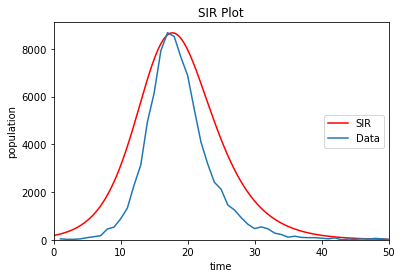

In [202]:
time, sList, iList, rList = eulerSIR(initial,1.62)
plot(time,sList,iList,rList)